# Niklas Tecklenburg (88481171)

## Research question/interests
After conducting the Exploaratory Data analysis, I came to the conclusion, that it might be difficult to identify proper coupling parameters for the Team and their drivers. On the other hand the analysis raised my curiosity, looking into individual races. Here I would like to come up with an analysis / analysis criteria, to evaluate which races in the past have been the most interesting one for spectators.

## Import Packages for the EDA

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [114]:
circuits = pd.read_csv('../data/raw/circuits.csv', na_values=['\\N'])
constructor_res = pd.read_csv('../data/raw/constructor_results.csv', na_values=['\\N'])
constructor_stand = pd.read_csv('../data/raw/constructor_standings.csv', na_values=['\\N'])
constructors = pd.read_csv('../data/raw/constructors.csv', na_values=['\\N'])
driver_stand = pd.read_csv('../data/raw/driver_standings.csv', na_values=['\\N'])
drivers = pd.read_csv('../data/raw/drivers.csv', na_values=['\\N'])
lap_times = pd.read_csv('../data/raw/lap_times.csv', na_values=['\\N'])
pit_stops = pd.read_csv('../data/raw/pit_stops.csv', na_values=['\\N'])
qualifying = pd.read_csv('../data/raw/qualifying.csv', na_values=['\\N'])
races = pd.read_csv('../data/raw/races.csv', na_values=['\\N'])
results = pd.read_csv('../data/raw/results.csv', na_values=['\\N'])
seasons = pd.read_csv('../data/raw/seasons.csv', na_values=['\\N'])
status = pd.read_csv('../data/raw/status.csv', na_values=['\\N'])

# Exploratory Data Analysis
As the Formula 1, the Rules and the Cars have changed over time, I am focusing on the development over time in my EDA. The EDA includes the following Analysis:
- Number of Seasons in the Dataset
- Races per Season
- Number of Drivers Winning a race per Season
- Development of Pit Stop Times over time
- Average number of Stops per Race per Season
- Number of Collisions (Driver could not finish race) per Year
- Average Number of Lappings in a Race per Season
- How did the max speed evolved

## Number of Seasons in the Dataset

In [115]:
len(seasons)

72

Our Dataset contains data for 72 Seasons. One has to notice, that results of the current season are also included, but this season is not yet over.

## Races per Seson

In [116]:
races_per_season = races.groupby('year').count().reset_index()[['year', 'raceId']].rename(columns={'raceId':'Number of Races'})

Text(0.5, 1.0, 'Races per Season')

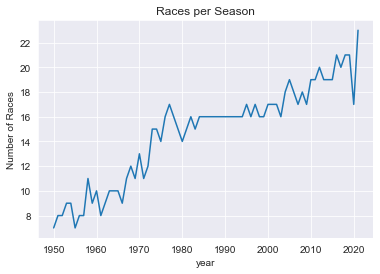

In [117]:
sns.lineplot(x=races_per_season['year'],y=races_per_season['Number of Races']).set_title("Races per Season")

## Number of Drivers Winning a race per Season
As I have noticed that the number of drivers participating in Races/Seasons, the number of Drivers needs to be considered here as well.

In [118]:
race_years = races[['raceId', 'year']]
df_results = results.merge(race_years, on='raceId', how='left')
df_results_driver_count = df_results.groupby('year').nunique().reset_index()
df_results_driver_count = df_results_driver_count[['driverId','year']]
df_results_driver_count = df_results_driver_count.rename(columns={'driverId': '#ofDrivers'})
race_winners = df_results[df_results['positionOrder'] == 1]
race_winners = race_winners.groupby(['year']).nunique().reset_index()
race_winners = race_winners[['driverId','year']]
race_winners = race_winners.rename(columns={'driverId':'#ofWinners'})
race_winners = race_winners.merge(df_results_driver_count, on='year', how='left')
race_winners = race_winners[['year', '#ofWinners', '#ofDrivers']]
race_winners['relative_num_winners'] = race_winners['#ofWinners'] / race_winners['#ofDrivers']
race_winners

,year,#ofWinners,#ofDrivers,relative_num_winners
0,1950,3,81,0.037037
1,1951,6,84,0.071429
2,1952,3,105,0.028571
3,1953,5,108,0.046296
4,1954,4,97,0.041237
...,...,...,...,...
67,2017,5,25,0.200000
68,2018,5,20,0.250000
69,2019,5,20,0.250000
70,2020,5,23,0.217391


Text(0.5, 1.0, 'Number of Drivers over Time')

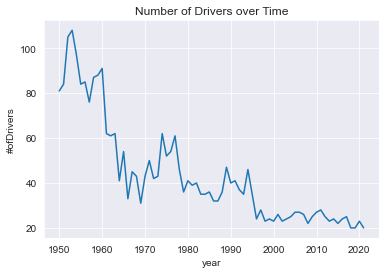

In [119]:
sns.lineplot(x=race_winners['year'],y=race_winners['#ofDrivers']).set_title("Number of Drivers over Time")

We can see that the number of drivers participating in a see has decreased from over 100 in the 50s to just above 20 from mid 90s to today. Looking into the rules there are 10 teams, with 2 drivers each. the peaks result from drivers missing a race and a replacment driver, taking the seat for this race.

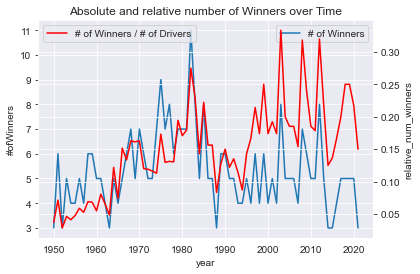

In [120]:
sns.lineplot(x=race_winners['year'],y=race_winners['#ofWinners'])
plt.legend(labels=['# of Winners'])
ax2 = plt.twinx()
sns.lineplot(x=race_winners['year'],y=race_winners['relative_num_winners'], ax=ax2, color="r").set_title("Absolute and relative number of Winners over Time")
plt.legend(labels=['# of Winners / # of Drivers'])

We can see, that there seems to be a slight upwards trend in the relative amount of different drivers, wining a race in a season.

## Development of Pit Stop Times over time

In [22]:
pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8369,1060,832,1,48,16:01:07,21.431,21431
8370,1060,20,2,49,16:02:39,20.841,20841
8371,1060,852,2,51,16:04:57,26.604,26604
8372,1060,1,2,53,16:06:32,21.421,21421


In [28]:
# Average duration
df_pit_stops = pit_stops.merge(race_years, on='raceId', how='left')
df_pit_stops_duration = df_pit_stops.groupby(['year']).mean().reset_index()
df_pit_stops_duration['Avg Duration in Seconds'] = df_pit_stops_duration['milliseconds'] / 1000 
df_pit_stops_duration

,year,raceId,driverId,stop,lap,milliseconds,Avg Duration in Seconds
0,2011,849.680431,219.649910,1.947038,27.572711,24448.849192,24.448849
1,2012,868.778013,326.889006,1.739958,25.416490,23283.769556,23.283770
2,2013,888.593060,461.409043,1.855941,25.309148,24121.318612,24.121319
3,2014,909.029412,456.474265,1.754902,24.678922,55088.632353,55.088632
4,2015,935.900135,505.113360,1.801619,27.109312,25500.213225,25.500213
5,2016,957.864510,544.389282,1.823054,22.561173,124357.194135,124.357194
6,2017,978.353026,586.048991,1.914986,19.799712,56789.619597,56.789620
7,2018,998.692164,636.968284,1.332090,25.369403,24674.283582,24.674284
8,2019,1020.086287,618.389831,1.520801,26.211094,24870.613251,24.870613
9,2020,1039.163300,674.471380,1.712121,26.984848,160940.321549,160.940322


Text(0.5, 1.0, 'Average Pit Stop Duration over Time')

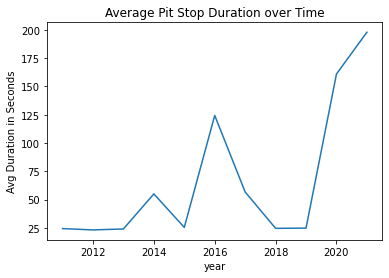

In [31]:
sns.lineplot(x=df_pit_stops_duration['year'], y=df_pit_stops_duration['Avg Duration in Seconds']).set_title("Average Pit Stop Duration over Time")

We see here some really high peaks, which are hard to explain, especially as we are talking about the average. When looking into the data behind we see, that there is an issue with the formating, that is not the same for every record. This causes the problem and we will take care of this in the Data Pipeline.

# Average number of Stops per Race per Season

In [33]:
# Aveage number of stops
df_pit_stops_number = df_pit_stops.groupby(['raceId','driverId']).max().reset_index()
df_pit_stops_number = df_pit_stops_number.groupby(['year']).mean().reset_index()
df_pit_stops_number['avg_stops_per_race'] = df_pit_stops_number['stop']
df_pit_stops_number

,year,raceId,driverId,stop,lap,milliseconds,avg_stops_per_race
0,2011,849.979021,225.608392,2.596737,39.477855,27492.722611,2.596737
1,2012,869.442953,329.574944,2.116331,34.908277,24396.982103,2.116331
2,2013,889.513716,457.650873,2.371571,36.301746,26190.623441,2.371571
3,2014,908.917989,458.838624,2.161376,34.505291,90976.293651,2.161376
4,2015,935.703170,499.657061,2.135447,35.386167,27515.438040,2.135447
5,2016,958.048724,543.958237,2.294664,31.821346,193524.948956,2.294664
6,2017,978.605042,585.392157,1.943978,29.680672,88961.081232,1.943978
7,2018,999.057592,627.853403,1.403141,29.272251,25313.510471,1.403141
8,2019,1019.960880,631.921760,1.591687,30.449878,25811.205379,1.591687
9,2020,1039.102236,678.246006,1.897764,33.878594,235613.910543,1.897764


Text(0.5, 1.0, 'Average number of Stops per Race per Season')

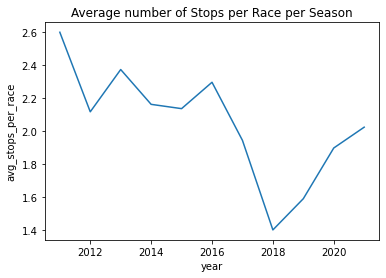

In [34]:
sns.lineplot(x=df_pit_stops_number['year'], y=df_pit_stops_number['avg_stops_per_race']).set_title('Average number of Stops per Race per Season')

## Number of Collisions (Driver could not finish race) per Year

In [35]:
df_results = df_results.merge(status, on="statusId", how='left')

In [36]:
df_results_col = df_results[(df_results['status']=='Collision') | (df_results['status']=='Collision damage')]
df_results_col = df_results_col.groupby(['year']).count().reset_index()

Text(0, 0.5, 'Number of Collisions')

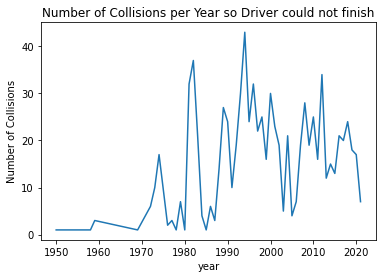

In [42]:
sns.lineplot(x=df_results_col['year'], y=df_results_col['status']).set_title('Number of Collisions per Year so Driver could not finish')
plt.ylabel('Number of Collisions')

Based on this plot it looks like the numbe of collisions increased over time. But taken the number of races per season into account this get relativised.

## Average Number of Lappings in a Race per Season

In [47]:
df_results_lap = df_results[df_results['status'].str.startswith('+')]
df_results_lap['Laps behind'] = df_results_lap['status'].str[1:-4].astype(int)
df_lapings_seas = df_results_lap.groupby('raceId').sum().reset_index()[['raceId', 'Laps behind']].rename({'Laps behind':'Avg Laps behind'})
df_results_lap = df_results_lap[['year', 'raceId']].merge(df_lapings_seas, on='raceId', how='left')
df_results_lap = df_results_lap.drop_duplicates()
df_results_lap = df_results_lap.groupby('year').mean().reset_index()

/var/folders/86/jj_j7bm56glckk9r2cy1875h0000gn/T/ipykernel_27000/2894694879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_lap['Laps behind'] = df_results_lap['status'].str[1:-4].astype(int)


Text(0, 0.5, '')

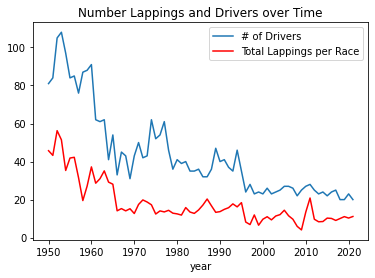

In [49]:
sns.lineplot(x=race_winners['year'],y=race_winners['#ofDrivers'])
sns.lineplot(x=df_results_lap['year'],y=df_results_lap['Laps behind'], color="r").set_title('Number Lappings and Drivers over Time')
plt.legend(labels=['# of Drivers', 'Total Lappings per Race'])
plt.ylabel('')

## How did the max speed evolved

In [122]:
df_results_speed = df_results.groupby('year').mean().reset_index()

Text(0.5, 1.0, 'Average Season-Race Top Speed over Time')

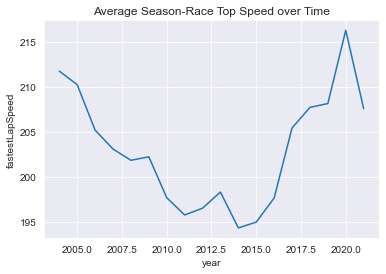

In [123]:
sns.lineplot(x=df_results_speed['year'], y=df_results_speed['fastestLapSpeed']).set_title('Average Season-Race Top Speed over Time')

# Data Analysis Pipeline
As I am planning to conduct analysis on how exciting a race has been, my Pipeline will focus on enriching the race table with new data from the other tables. I am going to collect data in order to include these characteristics:
- How many Overtakes occured in the race
- Was the race close at the top (time difference between 1st and 2nd and average time difference between first 10 drivers)
- Highest speed of the race
- Was this race faster then the previous races on this track (fastest lap compared to track record till date)
- Does the race have a tradition (how many races have been taken place here)
- Is the driver championship exciting?
- Is the constructors championship exciting?
- Average pitstop time

Besides these criteria, I am planning to include the following information to provide the reader with extra information:
- Date of the Race
- Location
- Race Winner + 2nd and 3rd
- Constructors Winner
- Leader of Drivers Championship at this point
- Leader of Constructors Championship at this point
- Pole Position


## Import Packages for Data Analysis Pipeline

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## 1. Load Data

In [275]:
circuits = pd.read_csv('../data/raw/circuits.csv')
constructor_res = pd.read_csv('../data/raw/constructor_results.csv')
constructor_stand = pd.read_csv('../data/raw/constructor_standings.csv')
constructors = pd.read_csv('../data/raw/constructors.csv')
driver_stand = pd.read_csv('../data/raw/driver_standings.csv')
drivers = pd.read_csv('../data/raw/drivers.csv')
lap_times = pd.read_csv('../data/raw/lap_times.csv')
pit_stops = pd.read_csv('../data/raw/pit_stops.csv')
qualifying = pd.read_csv('../data/raw/qualifying.csv')
races = pd.read_csv('../data/raw/races.csv')
results = pd.read_csv('../data/raw/results.csv')
seasons = pd.read_csv('../data/raw/seasons.csv')
status = pd.read_csv('../data/raw/status.csv')

## 2. Clean Data
Replace the not available data which are marked wit \N in the csv files with np.nan to deal with missing values properly

In [276]:
circuits = circuits.replace('\\N',np.nan)
constructor_res = constructor_res.replace('\\N',np.nan)
constructor_stand = constructor_stand.replace('\\N',np.nan)
constructors = constructors.replace('\\N',np.nan)
driver_stand = driver_stand.replace('\\N',np.nan)
drivers = drivers.replace('\\N',np.nan)
lap_times = lap_times.replace('\\N',np.nan)
pit_stops = pit_stops.replace('\\N',np.nan)
qualifying = qualifying.replace('\\N',np.nan)
races = races.replace('\\N',np.nan)
results = results.replace('\\N',np.nan)
seasons = seasons.replace('\\N',np.nan)
status = status.replace('\\N',np.nan)

# Take care of the pitstop time issue we identified in the EDA
pit_stops['duration'] = pit_stops['duration'].apply(lambda x: float(x.split(':')[1]) if ':' in x else float(x))

# Adjust datatype for fastest speed
results['fastestLapSpeed'] = results['fastestLapSpeed'].apply(lambda x: float(x))

# Adjust Time format of fastest lap to be seconds
results['fastestLapTime'] = results['fastestLapTime'].apply(lambda x: float(x.split(':')[0])*60+float(x.split(':')[1]) if type(x)==str else x) 

## 3. Process Data

In [277]:
# Bring races date into date format and drop time
races['date'] = pd.to_datetime(races['date'], infer_datetime_format=True) 
races = races.drop(columns='time')

# Build drivers name and delete not needed columns
drivers['Driver Name'] = drivers['forename'] + ' ' +  drivers['surname']
drivers = drivers[['driverId', 'Driver Name']]

# Delete not needed columns from the constructors table
constructors = constructors[['constructorId', 'name']].rename(columns={'name': 'Team Name'})

# Delete not needed data from constructors results
constructor_res = constructor_res[['raceId', 'constructorId','points']]

# Delete not needed columns from qualifiying table and select only pole sitters
qualifying = qualifying[qualifying['position']==1][['raceId','driverId']]

# Delete not needed columns form drivers standing
driver_stand = driver_stand[['raceId', 'driverId', 'points', 'position']]

# Delete not needed Data from Constructors Standing
constructor_stand = constructor_stand[['raceId', 'constructorId', 'points', 'position']]

# Delete not needed columns from circuits
circuits = circuits[['circuitId', 'name', 'location']].rename(columns={'name':'Circuit Name', 'location':'City'})

# Delete not needed Data from Pitstop times
pit_stops = pit_stops.drop(columns=['driverId', 'stop', 'lap', 'time', 'milliseconds']).rename(columns={'duration':'avg. Pitstop Duration (in s)'})

## 4. Wrangle Data

In [278]:
# expand results with year and circuitId for further wrangling
results = results.merge(races[['raceId', 'year', 'circuitId']], on='raceId', how='left')

# add Driver Name to results
results = results.merge(drivers, how='left', on='driverId')

# Add Track Information to the races dataframe
races = races.merge(circuits, how='left', on='circuitId')

# add Team Name to results
results = results.merge(constructors, how='left', on='constructorId')

# Add Winner to races (driver and its Team)
races = races.merge(results[['raceId', 'Driver Name', 'Team Name', 'positionOrder']], how='left', on='raceId')
races = races[races['positionOrder']==1].rename(columns={'Driver Name': '1st Driver Name','Team Name': '1st Team Name'}).drop(columns='positionOrder').drop_duplicates(subset=['year', 'raceId'])

# Add 2nd Place to races (driver and its Team)
races = races.merge(results[['raceId', 'Driver Name', 'Team Name', 'positionOrder']], how='left', on='raceId')
races = races[races['positionOrder']==2].rename(columns={'Driver Name': '2nd Driver Name','Team Name': '2nd Team Name'}).drop(columns='positionOrder').drop_duplicates(subset=['year', 'raceId'])

# Add 3rd Place to races (driver and its Team)
races = races.merge(results[['raceId', 'Driver Name', 'Team Name', 'positionOrder']], how='left', on='raceId')
races = races[races['positionOrder']==3].rename(columns={'Driver Name': '3rd Driver Name','Team Name': '3rd Team Name'}).drop(columns='positionOrder').drop_duplicates(subset=['year', 'raceId'])

# Add Constructors Name to constructor results and the the races Winner to Races
constructor_res = constructor_res.merge(constructors, how='left', on='constructorId')
constructors_winners = constructor_res.groupby(['raceId']).max().reset_index()[['raceId', 'points']]
constructors_winners = constructors_winners.merge(constructor_res, how='left', on=['raceId', 'points'])[['raceId', 'Team Name']].rename(columns={'Team Name': 'Constructors Winner'})
races = races.merge(constructors_winners, how='left', on='raceId').drop_duplicates()

# Add name to qualifying table and merge pole sitter into races
qualifying = qualifying.merge(drivers, how='left', on='driverId').drop(columns='driverId').rename(columns={'Driver Name': 'Pole Sitter'})
races = races.merge(qualifying, how='left', on='raceId').drop_duplicates()

# Add driver names to driver standing and merge current leader to races (leader after race)
driver_stand = driver_stand.merge(drivers, how='left', on='driverId').drop(columns='driverId')
races = races.merge(driver_stand[driver_stand['position']==1][['raceId', 'Driver Name']], how='left', on='raceId').rename(columns={'Driver Name':'Championship Leader (after Race)'}).drop_duplicates(subset=['year', 'raceId'])

# Add Team names to Constructors Championship and merge leader to races
constructor_stand = constructor_stand.merge(constructors, how='left', on='constructorId')
races = races.merge(constructor_stand[constructor_stand['position']==1][['raceId', 'Team Name']], how='left', on='raceId').rename(columns={'Team Name':'Constructors Leader (after Race)'}).drop_duplicates(subset=['year', 'raceId'])

# Add leaders (constructors and drivers) before the race (Sort all the races by date and get the leader after the previous race, add prev race Id column to do so)
prevLeaders = races[['year', 'round', 'Championship Leader (after Race)', 'Constructors Leader (after Race)']].rename(columns={'Championship Leader (before Race)':'Constructors Leader (before Race)'})
races['prev_round'] = races['round']-1
races = races.merge(prevLeaders, how='left', left_on=['year', 'prev_round'], right_on=['year', 'round']).drop(columns={'prev_round', 'round_y'}).rename(columns={'round_x':'round'}).drop_duplicates(subset=['year', 'raceId'])

# Find average pit stop duration and it to races
pit_stops = pit_stops.groupby(['raceId']).mean().reset_index()
races = races.merge(pit_stops, how='left', on='raceId').drop_duplicates(subset=['year', 'raceId'])

# Find difference between first and second and merge into races
diff_1_2 = results[results['positionOrder']==2][['raceId', 'time']].rename(columns={'time':'Difference 1st to 2nd (in s)'})
races = races.merge(diff_1_2[['raceId', 'Difference 1st to 2nd (in s)']], how='left', on='raceId').drop_duplicates(subset=['year', 'raceId'])
races['Difference 1st to 2nd (in s)'] = races['Difference 1st to 2nd (in s)'].apply(lambda x: x.strip(' sec') if type(x)==str else x)
races['Difference 1st to 2nd (in s)'] = races['Difference 1st to 2nd (in s)'].apply(lambda x: float(x[1:].split(':')[0])*60+float(x[1:].split(':')[1]) if (type(x)==str and ':'in x) else(float(x[1:].split(':')[0]) if type(x)==str else x))

# Find difference avg time difference between first 5 drivers and merge into races
diff_1_10 = results[results['positionOrder']==10][['raceId', 'time']].rename(columns={'time':'avg. Difference Top 5 (in s)'})
races = races.merge(diff_1_10[['raceId', 'avg. Difference Top 5 (in s)']], how='left', on='raceId').drop_duplicates(subset=['year', 'raceId'])
races['avg. Difference Top 5 (in s)'] = races['avg. Difference Top 5 (in s)'].apply(lambda x: float(x[1:].split(':')[0])*60+float(x[1:].split(':')[1]) if (type(x)==str and ':'in x) else(float(x[1:].split(':')[0]) if type(x)==str else x))
races['avg. Difference Top 5 (in s)'] = races['avg. Difference Top 5 (in s)'] / 4

# Find the races highspeed and merge it into races
highspeeds = results[['raceId', 'fastestLapSpeed']].groupby(['raceId']).max().reset_index()
races = races.merge(highspeeds, how='left', on='raceId').drop_duplicates(subset=['year', 'raceId']).rename(columns={'fastestLapSpeed':'Top Speed of the Race'})


def count_overtakes(raceId, df):
    '''Function to count the number of overtakes in a race, given the raceid and the laptime dataframe'''

    records = df[df['raceId']==raceId][['driverId', 'lap', 'position']]
    records_lat = records.rename(columns={'position':'position_after_round'})
    records_lat['lap'] = records_lat['lap'] + 1
    records = records.merge(records_lat, how='left',on=['driverId','lap'])
    records['overtakes'] = records['position'] - records['position_after_round']     
    records['overtakes'] = records['overtakes'].apply(lambda x: -x if x<0 else 0)
    return records['overtakes'].sum()

# Calculate the number of overtakes and include it into races
races['approx. Number of Overtakes'] = races['raceId'].apply(lambda x: count_overtakes(x, lap_times))

def count_prev_races(data, df):
    year = int(data.split(',')[0])
    circuitId = int(data.split(',')[1])
    return len(df[(df['year']<year)&(df['circuitId']==circuitId)])

# Include how often formula 1 raced on this track before
races['Number of prev. F1 Races'] = races['year'].astype(str) + ',' + races['circuitId'].astype(str)
races['Number of prev. F1 Races'] = races['Number of prev. F1 Races'].apply(lambda x: count_prev_races(x,races))

# Include fastest Lap Time
fastest_lap = results[['raceId', 'fastestLapTime']].groupby(['raceId']).min().reset_index()
races = races.merge(fastest_lap, how='left', on='raceId').drop_duplicates(subset=['year', 'raceId']).rename(columns={'fastestLapTime': 'Fastest Lap of the Race'})

def lap_record_to_date(data, df):
    year = int(data.split(',')[0])
    circuitId = int(data.split(',')[1])
    df = df[(df['year']<year)&(df['circuitId']==circuitId)]
    return df['fastestLapTime'].min()

# Include Lap record to date
races['Lap record to Date'] = races['year'].astype(str) + ',' + races['circuitId'].astype(str)
races['Lap record to Date'] = races['Lap record to Date'].apply(lambda x: lap_record_to_date(x,results))

# Include the difference in the driver championship between first and second
driver_stand_leader = driver_stand[driver_stand['position']==1][['raceId', 'points']].rename(columns={'points':'points1'})
driver_stand_second = driver_stand[driver_stand['position']==2][['raceId', 'points']].rename(columns={'points':'points2'})
driver_stand_difference = driver_stand_leader.merge(driver_stand_second, how='left', on='raceId')
driver_stand_difference['Driver Championship Point Difference'] = driver_stand_difference['points1']-driver_stand_difference['points2']
races = races.merge(driver_stand_difference[['raceId', 'Driver Championship Point Difference']], how='left', on='raceId').drop_duplicates(subset=['year', 'raceId'])

# Include the difference in the constructors championship between first and second
const_stand_leader = constructor_stand[constructor_stand['position']==1][['raceId', 'points']].rename(columns={'points':'points1'})
const_stand_second = constructor_stand[constructor_stand['position']==2][['raceId', 'points']].rename(columns={'points':'points2'})
const_stand_difference = const_stand_leader.merge(const_stand_second, how='left', on='raceId')
const_stand_difference['Constructors Championship Point Difference'] = const_stand_difference['points1']-const_stand_difference['points2']
races = races.merge(const_stand_difference[['raceId', 'Constructors Championship Point Difference']], how='left', on='raceId').drop_duplicates(subset=['year', 'raceId'])

# Save races into processed date folder
races.to_csv('../data/processed/Niklas_Processed/races.csv')
